In [46]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math

In [47]:
cryo_data = np.loadtxt("4K-Transmission-Data/4Kdata.csv", delimiter=",")

In [48]:
# equation for m values
m = 2.1731*10000*2*math.pi*1/1547.4
print(m)
m = 2.1731*10000*2*math.pi*1/1550
print(m)

88.23827058958224
88.09025800665779


In [49]:
x = cryo_data[:,0] 
del_lam = cryo_data[:,1]

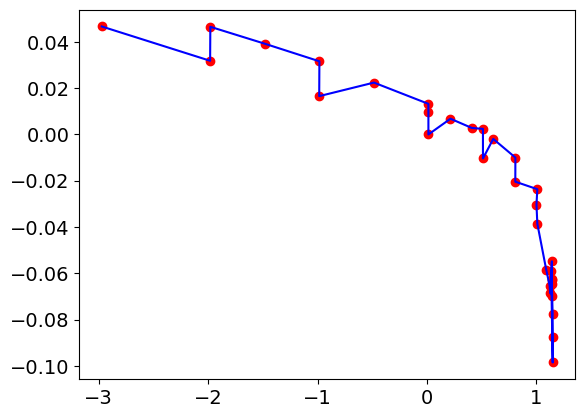

In [50]:


#y = func(x, -0.00005, 1.3, 0.05)
#rng = np.random.default_rng()
#y_noise = 0.2 * rng.normal(size=x.size)
#ydata = y + y_noise

plt.plot(x, del_lam, 'ro', label='data')
plt.plot(x, del_lam, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [51]:
R = 10000 #in nm
#n_eff = 3.453 - 1.13*del_lam - 0.04*del_lam**2
del_n_eff = del_lam*88/(2*np.pi*R)

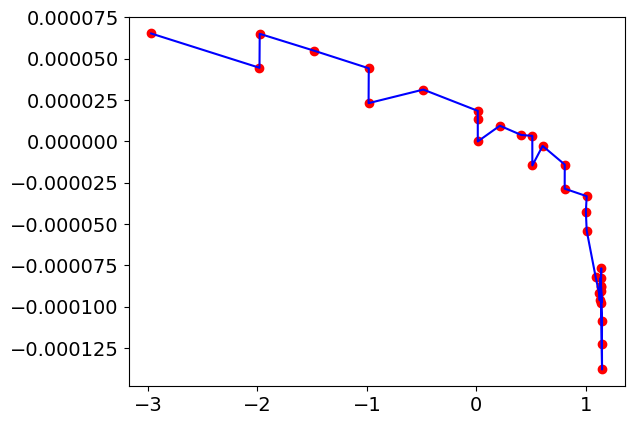

In [52]:
plt.plot(x, del_n_eff, 'ro', label='data')
plt.plot(x, del_n_eff, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

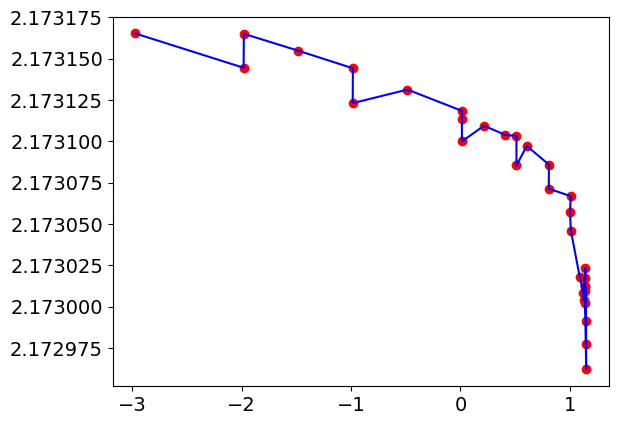

In [53]:
n_eff = 2.1731 + del_n_eff

plt.plot(x, n_eff, 'ro', label='data')
plt.plot(x, n_eff, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [54]:
print(x) #print voltages

[-2.97131678 -1.98142654 -1.9794033  -1.48234782 -0.98301792 -0.98472487
 -0.48473255  0.01267327  0.01290573  0.01290793  0.21464068  0.4097616
  0.51112705  0.51139218  0.60533962  0.80756193  0.80683139  1.00786016
  1.00037241  1.00794567  1.08937998  1.12027671  1.12668729  1.14105415
  1.13871478  1.14792531  1.14722337  1.14826189  1.13451163  1.13888302
  1.14191029  1.13943828]


In [55]:
np.savetxt("voltages.csv", x, delimiter = ",")

In [56]:
print(x[16],n_eff[16])

0.8068313869935695 2.1730713730428053


In [57]:
#now we can plot the values from the fit we got

fit_neff = [2.17285709,2.1728357,2.17281401,2.17279923,2.17278479,2.17275933,2.17273212]
fit_neff = np.array(fit_neff)
voltages = [-2,-1,0,0.5,0.8,1,1.1]

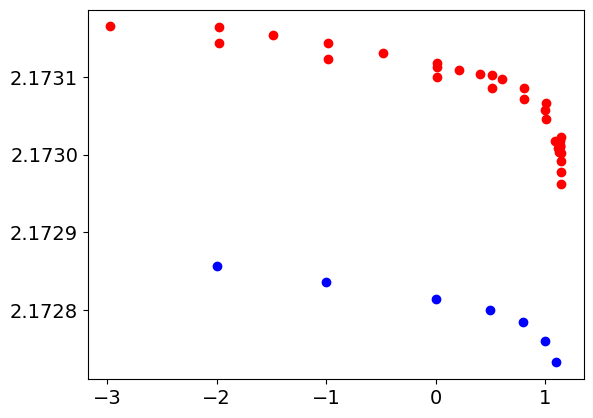

In [58]:
#the values plotted are a little off, but what is important is the del_lam,not the n_eff

plt.plot(x, n_eff, 'ro', label='data')
plt.plot(voltages, fit_neff, 'bo', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

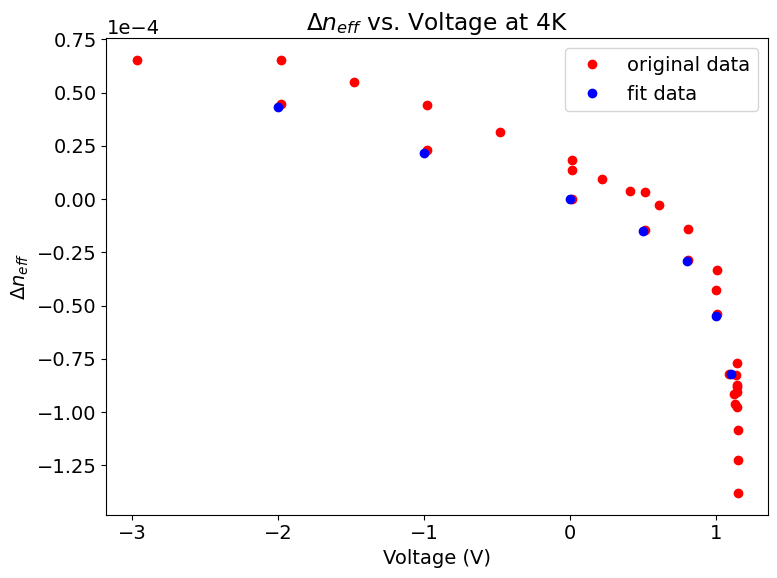

In [59]:
#n_eff = 2.17281401 + del_n_eff
del_fit_neff = fit_neff - 2.17281401
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.plot(x, del_n_eff, 'ro', label='original data')
plt.plot(voltages, del_fit_neff, 'bo', label='fit data')
plt.title("$\\Delta n_{eff}$ vs. Voltage at 4K")
plt.ticklabel_format(style = 'sci', axis = 'y', scilimits = (0,0))
plt.xlabel("Voltage (V)")
plt.ylabel("$\\Delta n_{eff}$")
plt.legend()
plt.tight_layout()
plt.savefig("4KFitCheck.png")

plt.show()

In [60]:
print(voltages)

[-2, -1, 0, 0.5, 0.8, 1, 1.1]


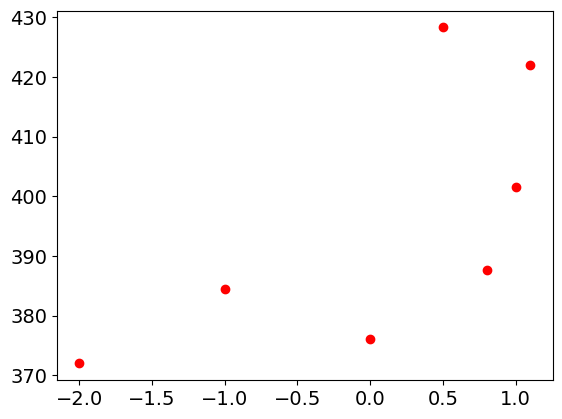

In [61]:
#absorption coefficient array
alpha = np.array([371.9953977, 384.50293209, 376.15263474, 428.30612884, 387.66747036, 401.55461326, 421.93732687])

plt.plot(voltages, alpha, 'ro', label='data')
#plt.plot(x, del_lam, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [62]:
#saving this to a csv file
np.savetxt("FinalCSVs/4KAbsorb.csv", np.c_[voltages, alpha], delimiter = ",")

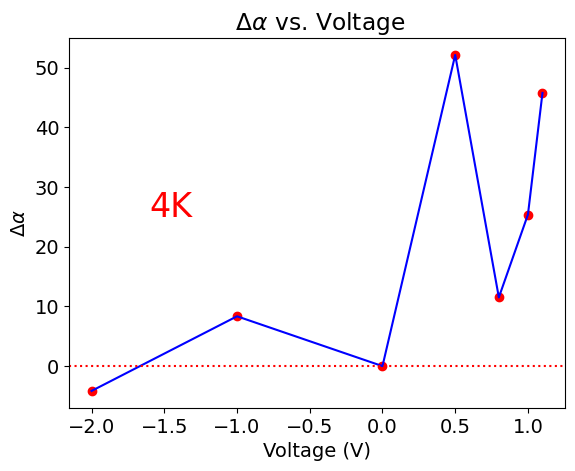

In [63]:
Dalpha = alpha - alpha[2]

plt.plot(voltages, Dalpha, 'ro', label='data')
plt.plot(voltages, Dalpha, 'b-', label='data')
plt.axhline(y = 0, color = 'r', linestyle = ':') 
plt.title( " $\\Delta \\alpha$ vs. Voltage ")
plt.xlabel('Voltage (V)')
plt.ylabel('$\\Delta \\alpha$')
plt.text(-1.6, 25, r'4K', color = "red", fontsize="24")
#plt.plot(x, del_lam, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.savefig("4K-D-alpha.png")
plt.show()

In [64]:
average_alpha = np.mean(alpha)
print(average_alpha)

396.01664340857144
